<a href="https://colab.research.google.com/github/somelijer/Fork-instance-segmentation/blob/main/InstanceSegmentationORI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Making subset of coco dataset


In [1]:
!pip install CocoDataset==0.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip /content/annotations_trainval2017.zip

--2023-06-23 12:04:49--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.64.156, 3.5.7.139, 3.5.28.226, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.64.156|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  45.3MB/s    in 5.7s    

2023-06-23 12:04:55 (42.0 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]

Archive:  /content/annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


In [58]:
from coco_dataset import coco_dataset_download as cocod
class_name='fork'
images_count=50
annotations_path='/content/annotations/instances_train2017.json'
cocod.coco_dataset_download(class_name,images_count,annotations_path)

loading annotations into memory...
Done (t=19.18s)
creating index...
index created!
no.of image: 1
no.of image: 2
no.of image: 3
no.of image: 4
no.of image: 5
no.of image: 6
no.of image: 7
no.of image: 8
no.of image: 9
no.of image: 10
no.of image: 11
no.of image: 12
no.of image: 13
no.of image: 14
no.of image: 15
no.of image: 16
no.of image: 17
no.of image: 18
no.of image: 19
no.of image: 20
no.of image: 21
no.of image: 22
no.of image: 23
no.of image: 24
no.of image: 25
no.of image: 26
no.of image: 27
no.of image: 28
no.of image: 29
no.of image: 30
no.of image: 31
no.of image: 32
no.of image: 33
no.of image: 34
no.of image: 35
no.of image: 36
no.of image: 37
no.of image: 38
no.of image: 39
no.of image: 40
no.of image: 41
no.of image: 42
no.of image: 43
no.of image: 44
no.of image: 45
no.of image: 46
no.of image: 47
no.of image: 48
no.of image: 49
no.of image: 50
finished images download


Making the annotations

In [59]:
import json
import os
import shutil

def create_fork_annotation_file(image_folder, annotation_file, output_folder, class_name, image_count):
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Load the COCO annotation file
    with open(annotation_file, 'r') as f:
        coco_data = json.load(f)

    # Filter images that contain only the specified class
    filtered_images = [image for image in coco_data['images'] if image['file_name'] in os.listdir(image_folder)]
    filtered_image_ids = [image['id'] for image in filtered_images]

    #print(filtered_image_ids)

    # Filter annotations for the selected images

    filtered_annotations = [annotation for annotation in coco_data['annotations'] if annotation['image_id'] in filtered_image_ids and annotation['category_id'] == 48]
    for annotation in filtered_annotations:
        annotation['category_id'] = 1
    print("Filtrirana anotacija: ",filtered_annotations[0])

    # Update the image and annotation lists in the filtered COCO data
    coco_data['images'] = filtered_images
    coco_data['annotations'] = filtered_annotations

    # Remove all other categories
    coco_data['categories'] = [{"id": 1, "name": class_name}]

    # Save the filtered annotation file
    output_annotation_file = os.path.join(output_folder, 'instances_fork.json')
    with open(output_annotation_file, 'w') as f:
        json.dump(coco_data, f)

    # Copy the selected fork images to the output folder
    for image in filtered_images:
        image_path = os.path.join(image_folder, image['file_name'])
        shutil.copy(image_path, output_folder)

    print(f"Filtered annotation file saved at: {output_annotation_file}")
    print(f"Selected fork images copied to: {output_folder}")

# Set the necessary variables for creating the filtered annotation file
image_folder = '/content/fork'  # Replace with the path to the folder containing your fork images from the COCO dataset
annotation_file = '/content/annotations/instances_train2017.json'  # Replace with the path to the original COCO annotation file
output_folder = '/content/subsetAnnotations'  # Replace with the desired output folder path

# Create the filtered annotation file and copy the selected images to the output folder
create_fork_annotation_file(image_folder, annotation_file, output_folder, class_name, images_count)


Filtrirana anotacija:  {'segmentation': [[482.62, 266.31, 466.63, 253.61, 459.18, 250.98, 454.14, 250.76, 451.08, 242.21, 451.3, 238.93, 459.18, 237.4, 465.75, 248.35, 470.35, 250.76, 487.0, 263.46]], 'area': 260.9945000000006, 'iscrowd': 0, 'image_id': 311374, 'bbox': [451.08, 237.4, 35.92, 28.91], 'category_id': 1, 'id': 2101729}
Filtered annotation file saved at: /content/subsetAnnotations/instances_fork.json
Selected fork images copied to: /content/subsetAnnotations


Test the data

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!

COCO categories: 
fork


Number of photos in dataset:  51 

[253955, 139270, 516106, 196619, 466960, 401425, 548882, 548889, 90138, 270362, 229407, 581668, 491558, 581674, 81964, 294957, 98361, 106557, 483389, 204863, 524352, 106567, 483401, 409674, 344138, 311374, 581711, 581715, 155732, 376919, 360536, 172121, 92, 155741, 24674, 524387, 278627, 303204, 131172, 352360, 409708, 98413, 110, 139372, 311408, 24689, 516205, 532595, 262261, 491638, 65655]


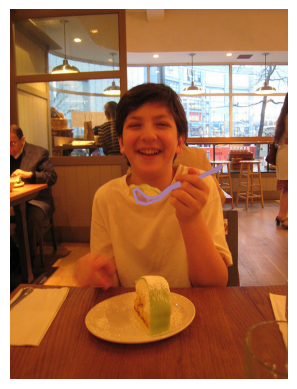

In [107]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab

def load_random_photo_with_annotations(annotation_file, image_folder):
    # Load the COCO annotation file
    coco = COCO(annotation_file)

    # display COCO categories and supercategories
    cats = coco.loadCats(coco.getCatIds())
    nms=[cat['name'] for cat in cats]
    print('\nCOCO categories: \n{}\n'.format(' '.join(nms)))

    # get all images containing given categories, select one at random
    catIds = coco.getCatIds(catNms=['fork']);
    imgIds = coco.getImgIds(catIds=catIds );
    img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

    print("\nNumber of photos in dataset: ",len(imgIds),"\n")
    print(imgIds)

    # load and display image
    # I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
    # use url to load image
    I = io.imread(img['coco_url'])\

    # load and display instance annotations
    plt.imshow(I); plt.axis('off')
    annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds)
    coco.showAnns(anns)



# Set the necessary variables
annotation_file = '/content/subsetAnnotations/instances_fork.json'  # Replace with the path to the filtered annotation file
image_folder = '/content/subsetAnnotations'  # Replace with the path to the folder containing the subset images

# Load a random photo with its annotations and segmentation masks
load_random_photo_with_annotations(annotation_file, image_folder)


# Create the model

In [6]:
import torch
import torchvision

model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)

# Replace the classifier head for the desired number of classes
num_classes = 2  # Including background and forks
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = torchvision.models.detection.faster_rcnn.FastRCNNPredictor(in_features, num_classes)

# Replace the mask predictor for the desired number of classes
in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
hidden_layer = 256
model.roi_heads.mask_predictor = torchvision.models.detection.mask_rcnn.MaskRCNNPredictor(in_features_mask, hidden_layer, num_classes)

# Print the modified model architecture
#print(model)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:02<00:00, 80.4MB/s]


In [ ]:
model.eval()

MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

# Import helper functions

In [116]:
import random
import torch

from torchvision.transforms import functional as F


class ToTensor(object):
    def __call__(self, image, target):
        image = F.to_tensor(image)
        return image, target

In [112]:
import copy
import os

import torch
import torch.utils.data
import torchvision

from pycocotools import mask as coco_mask
from pycocotools.coco import COCO

import numpy as np


class FilterAndRemapCocoCategories(object):
    def __init__(self, categories, remap=True):
        self.categories = categories
        self.remap = remap

    def __call__(self, image, target):
        anno = target["annotations"]
        anno = [obj for obj in anno if obj["category_id"] in self.categories]
        if not self.remap:
            target["annotations"] = anno
            return image, target
        anno = copy.deepcopy(anno)
        for obj in anno:
            obj["category_id"] = self.categories.index(obj["category_id"])
        target["annotations"] = anno
        return image, target


def convert_coco_poly_to_torch_mask(
    segmentations, height: int, width: int
) -> torch.tensor:
    """
    Converts polygons in COCO format to masks with size height*width. Result
    is returned as a torch tensor.
    Args:
        segmentations: List of COCO segmentations.
        height: Height of the target image.
        width: Width of the target image.
    Returns:
        masks: List of masks as a torch tensor.
    """
    masks = []
    for polygons in segmentations:
        rles = coco_mask.frPyObjects(polygons, height, width)
        mask = coco_mask.decode(rles)
        if len(mask.shape) < 3:
            mask = mask[..., None]
        mask = torch.as_tensor(mask, dtype=torch.uint8)
        mask = mask.any(dim=2)
        masks.append(mask)
    if masks:
        masks = torch.stack(masks, dim=0)
    else:
        masks = torch.zeros((0, height, width), dtype=torch.uint8)
    return masks


def convert_coco_poly_to_mask(segmentations, height: int, width: int) -> list:
    """
    Converts polygons in COCO format to masks with size height*width.
    Args:
        segmentations: List of COCO segmentations.
        height: Height of the target image.
        width: Width of the target image.
    Returns:
        masks: List of masks with elemnts of type np.uint8.
    """
    masks = []
    for polygons in segmentations:
        rles = coco_mask.frPyObjects(polygons, height, width)
        mask = coco_mask.decode(rles)
        if len(mask.shape) < 3:
            mask = mask[..., None]
        mask = mask.any(axis=2).astype(np.uint8)
        masks.append(mask)
    if not (masks):
        masks = np.zeros((0, height, width))
    return masks


class ConvertCocoPolysToMask(object):
    def __call__(self, image, target):
        w, h = image.size

        image_id = target["image_id"]
        image_id = torch.tensor([image_id])

        anno = target["annotations"]

        anno = [obj for obj in anno if obj["iscrowd"] == 0]

        boxes = [obj["bbox"] for obj in anno]
        # guard against no boxes via resizing
        boxes = torch.as_tensor(boxes, dtype=torch.float32).reshape(-1, 4)
        boxes[:, 2:] += boxes[:, :2]
        boxes[:, 0::2].clamp_(min=0, max=w)
        boxes[:, 1::2].clamp_(min=0, max=h)

        classes = [obj["category_id"] for obj in anno]
        classes = torch.tensor(classes, dtype=torch.int64)

        segmentations = [obj["segmentation"] for obj in anno]
        masks = convert_coco_poly_to_mask(segmentations, h, w)

        keypoints = None
        if anno and "keypoints" in anno[0]:
            keypoints = [obj["keypoints"] for obj in anno]
            keypoints = torch.as_tensor(keypoints, dtype=torch.float32)
            num_keypoints = keypoints.shape[0]
            if num_keypoints:
                keypoints = keypoints.view(num_keypoints, -1, 3)

        keep = (boxes[:, 3] > boxes[:, 1]) & (boxes[:, 2] > boxes[:, 0])
        boxes = boxes[keep]
        classes = classes[keep]
        masks = masks[keep]
        if keypoints is not None:
            keypoints = keypoints[keep]

        target = {}
        target["boxes"] = boxes
        target["labels"] = classes
        target["masks"] = masks
        target["image_id"] = image_id
        if keypoints is not None:
            target["keypoints"] = keypoints

        # for conversion to coco api
        area = torch.tensor([obj["area"] for obj in anno])
        iscrowd = torch.tensor([obj["iscrowd"] for obj in anno])
        target["area"] = area
        target["iscrowd"] = iscrowd

        return image, target


    def _has_valid_annotation(anno):
        # if it's empty, there is no annotation
        if len(anno) == 0:
            return False
        # if all boxes have close to zero area, there is no annotation
        if _has_only_empty_bbox(anno):
            return False
        # keypoints task have a slight different critera for considering
        # if an annotation is valid
        if "keypoints" not in anno[0]:
            return True
        # for keypoint detection tasks, only consider valid images those
        # containing at least min_keypoints_per_image
        if _count_visible_keypoints(anno) >= min_keypoints_per_image:
            return True
        return False

    assert isinstance(dataset, torchvision.datasets.CocoDetection)
    ids = []
    for ds_idx, img_id in enumerate(dataset.ids):
        ann_ids = dataset.coco.getAnnIds(imgIds=img_id, iscrowd=None)
        anno = dataset.coco.loadAnns(ann_ids)
        if cat_list:
            anno = [obj for obj in anno if obj["category_id"] in cat_list]
        if _has_valid_annotation(anno):
            ids.append(ds_idx)

    dataset = torch.utils.data.Subset(dataset, ids)
    return dataset


def get_coco_api_from_dataset(dataset):
    for _ in range(10):
        if isinstance(dataset, torchvision.datasets.CocoDetection):
            break
        if isinstance(dataset, torch.utils.data.Subset):
            dataset = dataset.dataset
    if isinstance(dataset, torchvision.datasets.CocoDetection):
        return dataset.coco
    return convert_to_coco_api(dataset)


class CocoDetection(torchvision.datasets.CocoDetection):
    def __init__(self, img_folder, ann_file):
        super(CocoDetection, self).__init__(img_folder, ann_file)

    def __getitem__(self, idx):
        img, target = super(CocoDetection, self).__getitem__(idx)
        image_id = self.ids[idx]
        target = dict(image_id=image_id, annotations=target)
        return img, target


def get_coco(root, image_set, transforms, mode="instances"):
    anno_file_template = "{}_{}2017.json"
    PATHS = {
        "train": (
            "train2017",
            os.path.join("annotations", anno_file_template.format(mode, "train")),
        ),
        "val": (
            "val2017",
            os.path.join("annotations", anno_file_template.format(mode, "val")),
        ),
        # "train": ("val2017", os.path.join("annotations", anno_file_template.format(mode, "val")))
    }

    t = [ConvertCocoPolysToMask()]

    if transforms is not None:
        t.append(transforms)
    transforms = T.Compose(t)

    img_folder, ann_file = PATHS[image_set]
    img_folder = os.path.join(root, img_folder)
    ann_file = os.path.join(root, ann_file)

    dataset = CocoDetection(img_folder, ann_file, transforms=transforms)

    if image_set == "train":
        dataset = _coco_remove_images_without_annotations(dataset)

    # dataset = torch.utils.data.Subset(dataset, [i for i in range(500)])

    return dataset


def get_coco_kp(root, image_set, transforms):
    return get_coco(root, image_set, transforms, mode="person_keypoints")


def coco_seg2bbox(polygons, image_height: int, image_width: int) -> list:
    """Converts polygons in COCO format to bounding box in pixels.
    Args:
        polygons:
        image_height: Height of the target image.
        image_width: Width of the target image.
    Returns: [x_min, y_min, width, height]
    """
    rles = coco_mask.frPyObjects(polygons, image_height, image_width)
    mask = coco_mask.decode(rles)
    bbox = coco_mask.toBbox(coco_mask.encode(np.asfortranarray(mask.astype(np.uint8))))

    return bbox[0].astype(int).tolist()


def convert_coco_poly_to_torch_bbox(
    segmentations: list, height: int, width: int
) -> (torch.tensor, torch.tensor):
    """
    Converts polygons in COCO format to bounding box in pixels. Returns
    bounding box coords in both COCO and VOC format. Results are returned as
    torch tensors.
    Args:
        segmentations: List of COCO segmentations.
        height: Height of the target image.
        width: Width of the target image.
    Returns:
        coco_bboxes: List of COCO bounding boxes as torch tensor [x_min, y_min, width, height]
        voc_bboxes: List of VOC bounding boxes as torch tensor [x_min, y_min, x_max, y_max]
    """
    coco_bboxes = []
    voc_bboxes = []
    for segmentation in segmentations:
        # calculate coco bbox
        coco_bbox = coco_seg2bbox(segmentation, height, width)
        coco_bboxes.append(coco_bbox)
        # calculate voc bbox
        voc_bbox = [
            coco_bbox[0],
            coco_bbox[1],
            coco_bbox[0] + coco_bbox[2],
            coco_bbox[1] + coco_bbox[3],
        ]
        voc_bboxes.append(voc_bbox)

    # convert bboxes to torch tensors
    coco_bboxes = torch.as_tensor(coco_bboxes, dtype=torch.float32)
    voc_bboxes = torch.as_tensor(voc_bboxes, dtype=torch.float32)

    return coco_bboxes, voc_bboxes


def convert_coco_poly_to_bbox(
    segmentations: list, height: int, width: int
) -> (list, list):
    """
    Converts polygons in COCO format to bounding box in pixels. Returns
    bounding box coords in both COCO and VOC format.
    Args:
        segmentations: List of COCO segmentations.
        height: Height of the target image.
        width: Width of the target image.
    Returns:
        coco_bboxes: List of COCO bounding boxes [x_min, y_min, width, height]
        voc_bboxes: List of VOC bounding boxes [x_min, y_min, x_max, y_max]
    """
    coco_bboxes = []
    voc_bboxes = []
    for segmentation in segmentations:
        # calculate coco bbox
        coco_bbox = coco_seg2bbox(segmentation, height, width)
        coco_bboxes.append(coco_bbox)
        # calculate voc bbox
        voc_bbox = [
            coco_bbox[0],
            coco_bbox[1],
            coco_bbox[0] + coco_bbox[2],
            coco_bbox[1] + coco_bbox[3],
        ]
        voc_bboxes.append(voc_bbox)

    return coco_bboxes, voc_bboxes


In [113]:
import os
import cv2
import json
import yaml
import random
import jsonschema
import numpy as np
from shutil import copyfile

image_schema = {
    "type": "object",
    "properties": {"file_name": {"type": "string"}, "id": {"type": "integer"}},
    "required": ["file_name", "id"],
}

segmentation_schema = {
    "type": "array",
    "items": {"type": "array", "items": {"type": "number"}, "additionalItems": False},
    "additionalItems": False,
}

annotation_schema = {
    "type": "object",
    "properties": {
        "image_id": {"type": "integer"},
        "category_id": {"type": "integer"},
        "segmentation": segmentation_schema,
    },
    "required": ["image_id", "category_id", "segmentation"],
}

category_schema = {
    "type": "object",
    "properties": {"name": {"type": "string"}, "id": {"type": "integer"}},
    "required": ["name", "id"],
}

coco_schema = {
    "type": "object",
    "properties": {
        "images": {"type": "array", "items": image_schema, "additionalItems": False},
        "annotations": {
            "type": "array",
            "items": annotation_schema,
            "additionalItems": False,
        },
        "categories": {
            "type": "array",
            "items": category_schema,
            "additionalItems": False,
        },
    },
    "required": ["images", "annotations", "categories"],
}


def read_and_validate_coco_annotation(coco_annotation_path: str) -> (dict, bool):
    """
    Reads coco formatted annotation file and validates its fields.
    """
    try:
        with open(coco_annotation_path) as json_file:
            coco_dict = json.load(json_file)
        jsonschema.validate(coco_dict, coco_schema)
        response = True
    except jsonschema.exceptions.ValidationError as e:
        print("well-formed but invalid JSON:", e)
        response = False
    except json.decoder.JSONDecodeError as e:
        print("poorly-formed text, not JSON:", e)
        response = False

    return coco_dict, response


def process_coco(coco_file_path: str) -> (list, dict):
    """
    Accepts a coco object detection file.
    Returns list of images and categories.
    """
    # check if coco file is valid and read it
    (coco_dict, response) = read_and_validate_coco_annotation(coco_file_path)

    # raise error if coco file is not valid
    if not (response):
        raise TypeError

    # rearrange coco file for better annotation reach
    images = list()
    for image in coco_dict["images"]:
        image_annotations = list()
        for annotation in coco_dict["annotations"]:
            if image["id"] == annotation["image_id"]:
                image_annotations.append(annotation)
        image["annotations"] = image_annotations
        images.append(image)

    return images, coco_dict["categories"]

In [126]:
import os
import cv2
import torch
import numpy as np
from albumentations import Compose

"""
This dataset loader consumes coco annotation file that includes segmentation masks.
Example coco file format:
    coco_dict = {
            "images": [
                    {"file_name":"data/midv500/images/example1.tif", "id":1},
                    {"file_name":"data/midv500/images/example2.tif", "id":2}
            ],
            "annotations": [
                    {"image_id":1, "category_id":1, "segmentation":[[x1, y1, x2, y2, x3, y3]]},
                    {"image_id":1, "category_id":2, "segmentation":[[x1, y1, x2, y2, x3, y3]]},
                    {"image_id":2, "category_id":1, "segmentation":[[x1, y1, x2, y2, x3, y3]]}
            ],
            "categories": [
                    {'name': 'id_card', 'id': 1},
                    {'name': 'person', 'id': 2}
            ]
    }
"""


class COCODataset(object):
    """
    Compatible with any coco style annotation file, annotations must include
    segmentation mask (polygon coordinates). Bboxes are created from masks.
    Arguments:
        root_dir: Root directory that contains image files. Relative image
        file locations from coco file will be joined with this root_dir while
        iterating.
        coco_path: Path to the coco style annotation file.
        transforms: Albumentations compose object.
    """

    def __init__(self, root_dir: str, coco_path: str):
        self.root_dir = root_dir
        self.transforms = None
        # process coco file
        images, categories = process_coco(coco_path)
        self.images = images
        self.categories = categories
        self.num_classes = len(self.categories)

    def __getitem__(self, idx):
        # get one image dict from processed coco file
        image_dict = self.images[idx]

        # parse image path
        relative_image_path = image_dict["file_name"]
        # get absolute image path
        abs_image_path = os.path.join(self.root_dir, relative_image_path)
        # load image
        image = cv2.imread(abs_image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # parse annotations
        segmentations = []
        category_ids = []

        # find if negative sample
        is_negative_sample = False
        if len(image_dict["annotations"]) == 0:
            is_negative_sample = True
            voc_bboxes = []

        if not is_negative_sample:
            for annotation in image_dict["annotations"]:
                # get segmentation polygons
                segmentations.append(annotation["segmentation"])
                # get category id
                category_id = annotation["category_id"]
                category_ids.append(category_id)

            # create masks from coco segmentation polygons
            masks = convert_coco_poly_to_mask(
                segmentations, height=image.shape[0], width=image.shape[1]
            )

            # create coco and voc bboxes from coco segmentation polygons
            (coco_bboxes, voc_bboxes) = convert_coco_poly_to_bbox(
                segmentations, height=image.shape[0], width=image.shape[1]
            )


        # check again if augmentation result is negative sample
        if (not is_negative_sample) and (self.transforms is not None):
            if len(augmented["bboxes"]) == 0:
                is_negative_sample = True

        # convert everything into a torch.Tensor
        target = {}

        # boxes
        if (not is_negative_sample) and (
            not voc_bboxes == []
        ):  # if not negative taret and voc_bboxes is not empty
            target["boxes"] = boxes = to_float32_tensor(voc_bboxes)
        else:  # negative target
            target["boxes"] = boxes = torch.zeros((0, 4), dtype=torch.float32)

        # labels
        if not is_negative_sample:  # positive target
            target["labels"] = to_int64_tensor(category_ids)
        else:  # negative target
            target["labels"] = torch.zeros(0, dtype=torch.int64)

        # masks
        if not is_negative_sample:  # positive target
            target["masks"] = to_uint8_tensor(masks)
        else:  # negative target
            target["masks"] = torch.zeros(
                0, image.shape[0], image.shape[1], dtype=torch.uint8
            )

        target["area"] = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        target["image_id"] = torch.tensor([idx])
        num_objects = len(target["boxes"])
        target["iscrowd"] = torch.zeros((num_objects,), dtype=torch.int64)

        # normalize image
        image = image / np.max(image)
        return image_to_float_tensor(image), target

    def __len__(self):
        return len(self.images)



def to_float32_tensor(to_be_converted):
    return torch.as_tensor(to_be_converted, dtype=torch.float32)


def to_int64_tensor(to_be_converted):
    return torch.as_tensor(to_be_converted, dtype=torch.int64)


def to_uint8_tensor(to_be_converted):
    return torch.as_tensor(to_be_converted, dtype=torch.uint8)


def image_to_float_tensor(image):
    # Converts numpy images to pytorch format
    return torch.from_numpy(image.transpose(2, 0, 1)).float()

# Instantiate the dataset loader

In [127]:
dataset_root = '/content'  # Replace with the path to your dataset root folder
image_folder = dataset_root + '/subsetAnnotations'
annotation_file = dataset_root + '/subsetAnnotations/instances_fork.json'

train_dataset = COCODataset(image_folder, annotation_file)


# Train the model

In [132]:
from torch.utils.data import DataLoader
from torchvision.datasets import CocoDetection
from torchvision.transforms import ToTensor

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def train(model, data_loader, optimizer, device):
    model.train()  # Set the model to training mode

    for images, targets in data_loader:
        images = list(image.to(device) for image in images)


        if isinstance(targets, list):
            # Targets are provided as a list
            pass  # No need to modify the targets
        elif isinstance(targets, torch.Tensor):
            # Targets are provided as a tensor
            targets = targets.to(device)
        else:
            raise TypeError("Unsupported target type. Expected list or torch.Tensor.")

        # Clear the gradients
        optimizer.zero_grad()

        # Forward pass
        loss_dict = model(images, targets)

        # Compute the total loss
        losses = sum(loss for loss in loss_dict.values())

        # Backward pass
        losses.backward()

        # Update the weights
        optimizer.step()





num_classes = 2  # Including background and forks



# Set the batch size and other training parameters
batch_size = 4
num_workers = 2
shuffle = True


In [130]:
def custom_collate_fn(batch):
    images = []
    targets = []

    max_height = max([image.shape[1] for image, _ in batch])
    max_width = max([image.shape[2] for image, _ in batch])

    for image, target in batch:
        pad_height = max_height - image.shape[1]
        pad_width = max_width - image.shape[2]

        padded_image = torch.nn.functional.pad(image, (0, pad_width, 0, pad_height))

        images.append(padded_image)
        targets.append(target)

    return images, targets



In [133]:
# Create the data loader
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers, collate_fn=custom_collate_fn)


# Set the optimizer and learning rate
optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.9, weight_decay=0.0005)

# Move the model to the device
model.to(device)

# Train for one epoch
train(model, train_data_loader, optimizer, device)

<ipython-input-126-813ab547d560>:143: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  return torch.as_tensor(to_be_converted, dtype=torch.uint8)
<ipython-input-126-813ab547d560>:143: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  return torch.as_tensor(to_be_converted, dtype=torch.uint8)


RuntimeError: ignored